## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "campaign"
hashtag = "キャンペーン" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-22T00:00+09:00"
end = "2022-11-24T23:59+09:00"
timespan = "22-24"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

DF = df.copy()

In [4]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=30')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 124


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/campaign/original/キャンペーン_22-24_124_aam


In [6]:
G.number_of_nodes()

21027

In [7]:
tb.check_degree(G)

singleton:[]


,degree
キャンペーン,21026
プレゼント,3884
プレゼントキャンペーン,3271
キャンペーン実施中,2591
プレゼント企画,2378
...,...
BASE10周年を記念して,1
ソヤファームクラブ,1
ミキハウス,1
たま整骨院,1


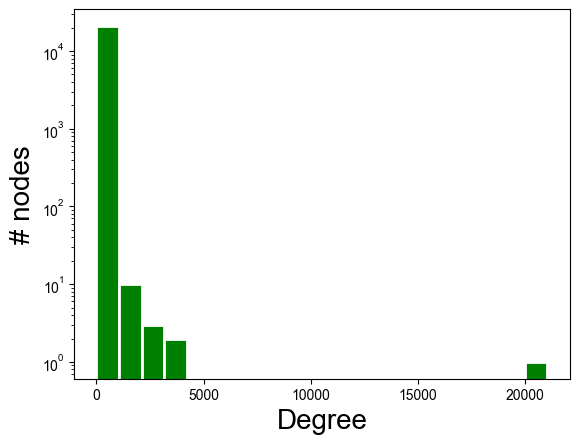

In [8]:
tb.plot_dd(G, 20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5858328496951337, 
its standard error sigma: 0.04184852831992192, 
k_min: 68.0


(2.5858328496951337, 0.04184852831992192, 68.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 0.00552965554972869.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.7567492756266567.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5858328496951337, 
its standard error sigma: 0.04184852831992192, 
k_min: 68.0


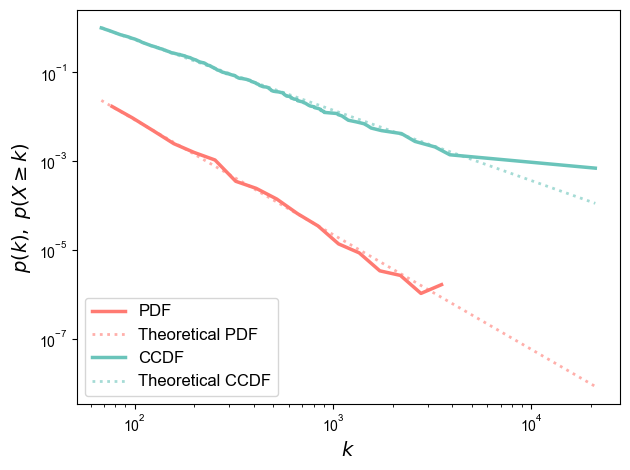

In [12]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [13]:
G.remove_node(hashtag)
#G.remove_nodes_from([hashtag, ""])
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
['たま整骨院', 'BASE10周年を記念して', 'ミキハウス', 'atutti', 'ソヤファームクラブ']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [14]:
tb.check_degree(G)

singleton:[]


,degree
プレゼント,3883
プレゼントキャンペーン,3270
キャンペーン実施中,2590
プレゼント企画,2377
懸賞,2215
...,...
くじ運最強,1
auショップ佐倉296,1
西川,1
レインボーフレーバー,1


In [15]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.590492350645353, 
its standard error sigma: 0.042341679243712675, 
k_min: 68.0


(2.590492350645353, 0.042341679243712675, 68.0)

In [16]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 6.137148541037341e-09.


In [17]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.4667904066286732.


In [18]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_campaign_22-24_124.pdf
../data/figure/degree_distribution/pdfccdf2_campaign_22-24_124.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.590492350645353, 
its standard error sigma: 0.042341679243712675, 
k_min: 68.0


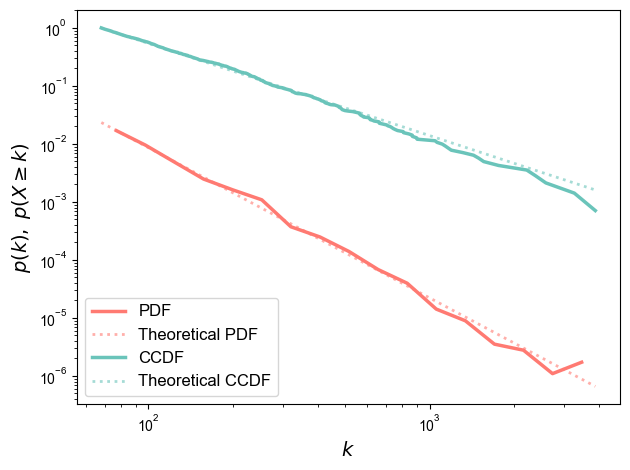

In [22]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)
#tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.590492350645353, 
its standard error sigma: 0.042341679243712675, 
k_min: 68.0


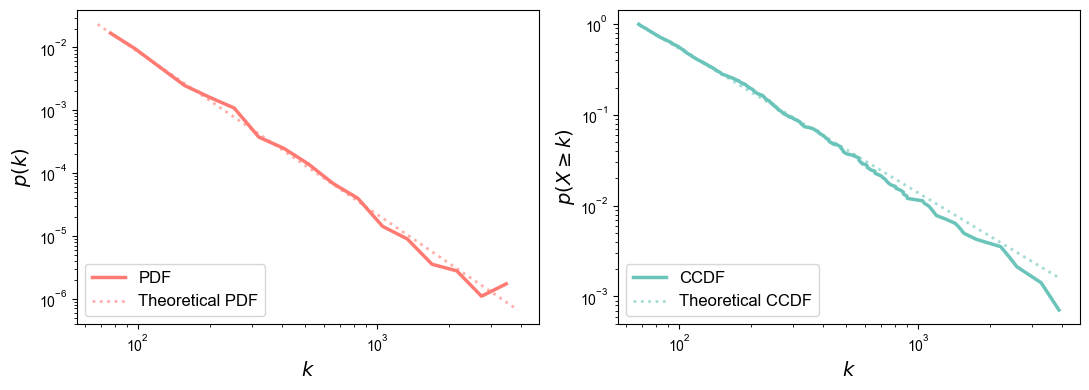

In [23]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)
#tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA")

In [21]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')